In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/MuTe/ExploracionInicial/ToF

Mounted at /content/drive
/content/drive/My Drive/MuTe/ExploracionInicial/ToF


In [ ]:
#@title imports { display-mode: "form" }
import matplotlib as mpl 
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import cm as CM
from matplotlib.ticker import LinearLocator, FormatStrFormatter
style.use('fivethirtyeight')
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from numpy import *
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture
import pandas as pd
from sklearn.decomposition import PCA, FastICA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
import scipy as sp
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from scipy import stats
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# **Determinar algoritmos de aprendizaje no supervisado para separar los mounes de bajo momentum.**

In [ ]:
%cd /content/drive/My Drive/MuTe/ExploracionInicial/ToF
#Carga de datos crudos acotados directamente de la terminal de linux
ToF=np.loadtxt('ToF_data_nanoseconds.dat')
carga=np.loadtxt('ToF_data.dat')

/content/drive/My Drive/MuTe/ExploracionInicial/ToF


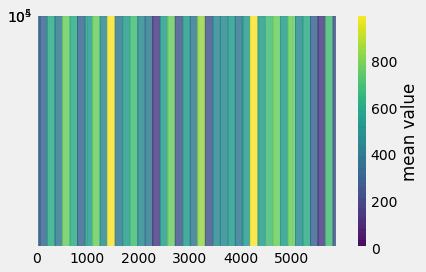

In [ ]:
plt.figure(figsize=(6,4))
gridsize=40
plt.hexbin(range(len(ToF)),ToF,  gridsize=gridsize,alpha= 0.8,  bins=1000)
plt.axis([0, len(ToF), ToF.min(), ToF.max()])
plt.yscale("log")
#axs.set_xscale("log")
#axs.set_yscale("log")

cb = plt.colorbar()
cb.set_label('mean value')
plt.show() 

In [ ]:
ToF.shape
mapa_edades = {}
ToFx= np.array([], dtype=int)
ToFy=np.array([], dtype=int)

for edad in ToF:
	if edad in mapa_edades:
		mapa_edades[edad] += 1
	else:
		mapa_edades[edad] = 1
for valor in sorted(mapa_edades):
  ToFx=np.append(ToFx, valor)
  ToFy=np.append(ToFy, mapa_edades[valor])
ToF.shape

(5883,)

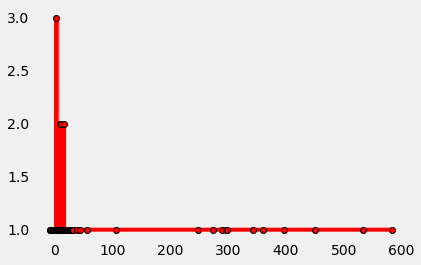

In [ ]:
plt.plot(ToFx[:230],ToFy[:230],'-or',markeredgecolor="black", lw=4)
plt.grid(False)
#plt.ylim(1,3,1)
plt.show()

/content/drive/MyDrive/MuTe/ExploracionInicial/img2


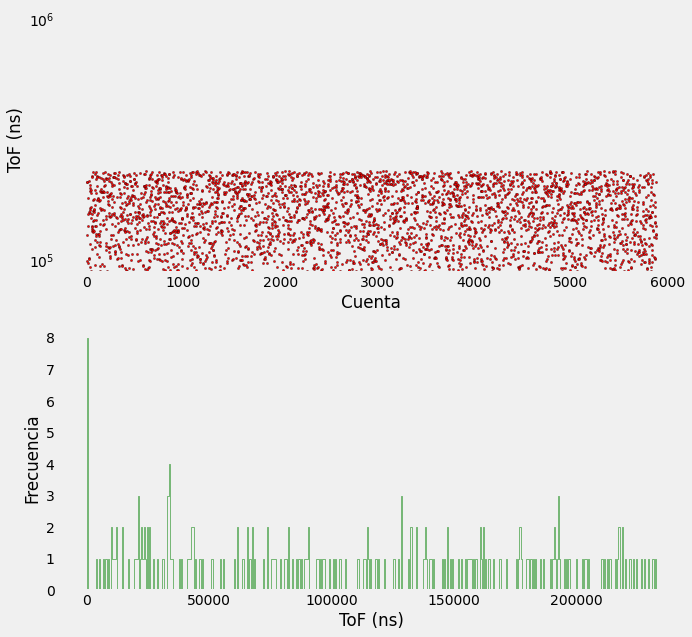

In [ ]:
%cd /content/drive/MyDrive/MuTe/ExploracionInicial/img2
fig, ax = plt.subplots(2, figsize=(10,10))
plt.rcParams['axes.facecolor']='w'
plt.rcParams['savefig.facecolor'] = 'w'
ax[0].scatter(range(len(ToF)),ToF, lw=0.3, s=5, edgecolors = 'black',  color='red',label="Histogram") #edgecolors = 'blue', 
ax[0].set_yscale("log")
ax[0].set_ylabel("ToF (ns)");
ax[0].set_xlabel("Cuenta");
ax[0].grid(False)

plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor'] = 'w'
ax[1].hist(ToF[:230], bins=500,histtype='step', color='green')
ax[1].set_ylabel("Frecuencia");
ax[1].set_xlabel("ToF (ns)");
ax[1].grid(False)

#plt.savefig('ToFS.png', format='png', bbox_inches='tight', pad_inches=0.2)

In [ ]:
ToF.min()

-8.076891708201178

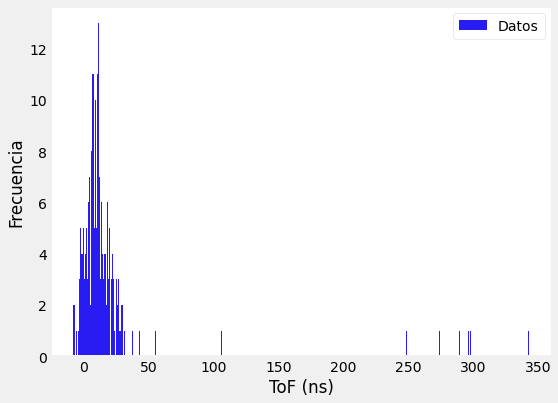

In [ ]:
#histograma de frecuencia para los datos de ToF
ToF.sort()
plt.figure(figsize=(8,6))
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor'] = 'w'
plt.hist(ToF[:230], bins=500,histtype='bar', color='#291CF2',label='Datos')
plt.ylabel("Frecuencia");
plt.xlabel("ToF (ns)");
plt.legend()
plt.grid(False)
plt.savefig('ToFS.png', format='png', bbox_inches='tight', pad_inches=0.2)


# **Visualización de datos en orden logaritmica**








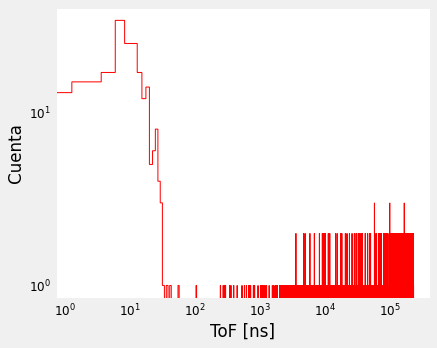

In [ ]:
#cada valor de ToF en orden logaritmico 
plt.figure(figsize=(6,5))
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor'] = 'w'
plt.hist(ToF,color='red', lw=1,bins=100000,histtype='step')
plt.ylabel("Cuenta");
plt.xlabel("ToF [ns]");
plt.tick_params(axis='both',which='major',labelsize=12)
plt.xscale('log')
plt.yscale('log')

#plt.axis([0,10000,0,100])
plt.grid(False)
plt.savefig('Log.png', format='png', bbox_inches='tight', pad_inches=0.2)
plt.show()

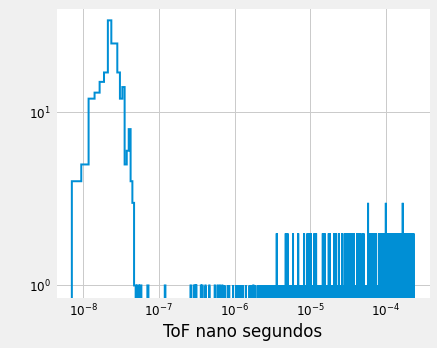

In [ ]:

plt.figure(figsize=(6,5))
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor'] = 'w'
plt.hist(carga, lw=2,bins=100000,histtype='step')
plt.ylabel(" ");
plt.xlabel("ToF nano segundos");
plt.tick_params(axis='both',which='major',labelsize=12)
plt.xscale('log')
plt.yscale('log')

#plt.axis([0,10000,0,100])
#plt.grid()

plt.show()

In [ ]:
# Instanciar el modelo
numero_muestras = len(ToF)
# Intentamos ajustar los valores de carga a dos distribuciones normales
GMM = GaussianMixture(n_components=2, 
                      covariance_type='full', 
                      max_iter=1000,
                      n_init=5,
                      weights_init=[.9,.1]) 
# Entrenamiento
GMM.fit(ToF[:230].reshape(-1,1));
print('Converge:',GMM.converged_) # 
# Parámetros
weights = GMM.weights_
means = GMM.means_ 
covariances = GMM.covariances_

Converge: True


In [ ]:
# valores de carga
gmm_x = ToF[:]
# obtener las probabilidades para cada valor de carga
gmm_y = np.exp(GMM.score_samples(gmm_x.reshape(-1,1)))

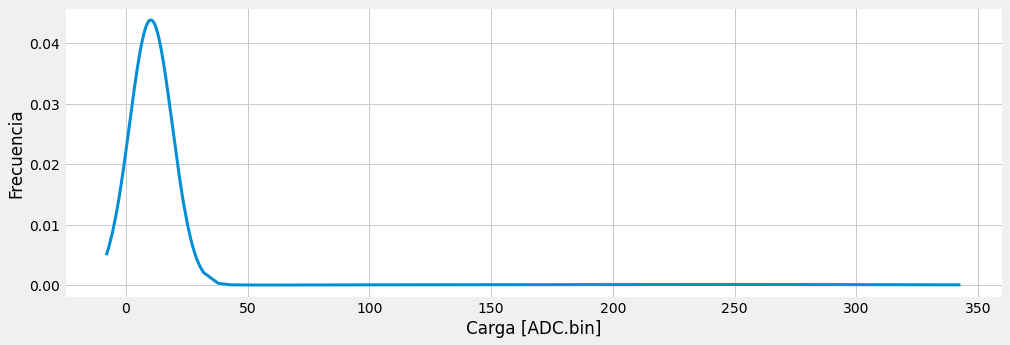

In [ ]:
#resultante del ajuste de modelo entrenado con los datos de ToF
plt.figure(figsize=(15,5))
mpl.rcParams['agg.path.chunksize'] = 1000
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor'] = 'w'
plt.plot(gmm_x[:230],gmm_y[:230], lw=3, label="Histogram")
plt.ylabel("Frecuencia");
plt.xlabel("Carga [ADC.bin]");

In [ ]:
#impresión de parametros devueltos por GMM como la media, la varianza y los pesos 
covariances=covariances[np.argsort(means.flatten())]
means=means[np.argsort(means.flatten())]
print('Parametros')
print('medias', means)
print('varianzas', covariances)
print('pesos', weights)

Parametros
medias [[ 10.22482605]
 [222.24034398]]
varianzas [[[   76.80995047]]

 [[11441.57262551]]]
pesos [0.96218539 0.03781461]


In [ ]:
#separación de los datos correlacionados teniendo en cuenta la curva ajustada por el modelo 
m=int(means[0])
c=int(covariances[0])
ex= np.array([], dtype=int)
ey= np.array([], dtype=int)
for x in range(len(gmm_y[:230])):
  if int(gmm_x[x]) < c:
    ex=np.append(ex, gmm_x[x])
    ey=np.append(ey, gmm_y[x])

In [ ]:
#tamaño del vector resultante 
ex.shape

(223,)

/content/drive/MyDrive/MuTe/ExploracionInicial/img2


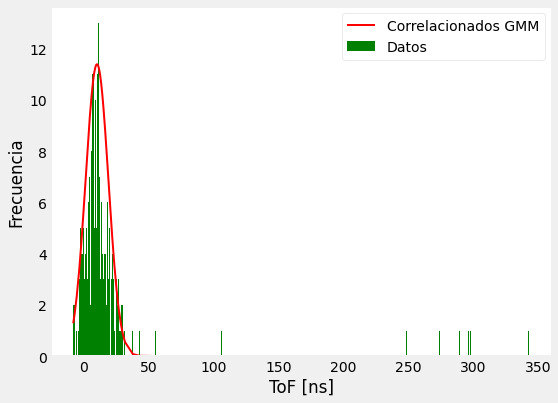

In [ ]:
#comparativa  de la curva obtenidad pormel ajuste del GMM y los datos 
%cd /content/drive/MyDrive/MuTe/ExploracionInicial/img2
plt.figure(figsize=(8,6))
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor'] = 'w'
plt.plot(ex,260*ey,'-r',markeredgecolor="black", lw=2, label="Correlacionados GMM")
plt.hist(ToF[:230], bins=500,histtype='bar',rwidth=3, color='green', label="Datos")
plt.ylabel("Frecuencia");
plt.xlabel("ToF [ns]");
plt.legend()
plt.grid(False)
plt.savefig('Correla.png', format='png', bbox_inches='tight', pad_inches=0.2)


# **ToF vs momentum**



In [ ]:
%cd /content/drive/My Drive/MuTe/ExploracionInicial/ToF
#Carga de datos crudos momentum y ToF
cargaM=np.loadtxt('MomToF.dat')
cargaM.shape

/content/drive/My Drive/MuTe/ExploracionInicial/ToF


(10434, 2)

In [ ]:
max(cargaM[:,0]),max(cargaM[:,1])


(364.13, 1460.73)

/content/drive/MyDrive/MuTe/ExploracionInicial/img2


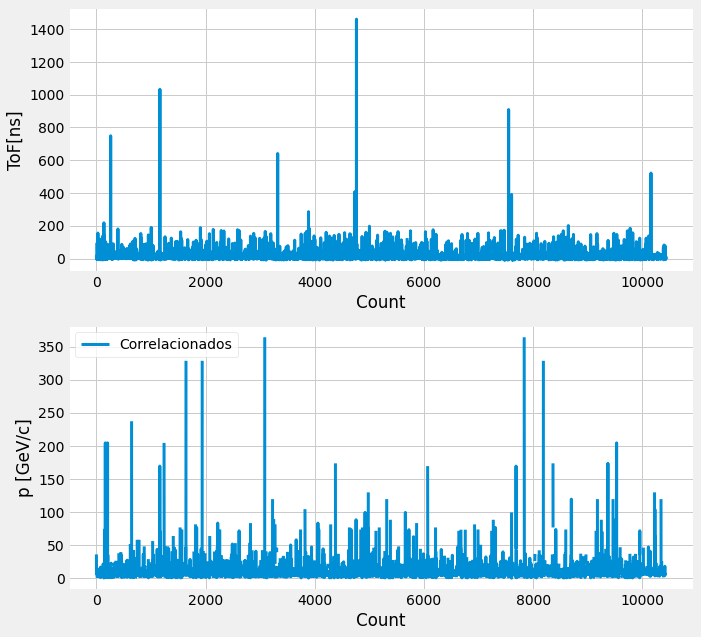

In [ ]:
%cd /content/drive/MyDrive/MuTe/ExploracionInicial/img2
fig, ax = plt.subplots(2, figsize=(10,10))
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor'] = 'w'
ax[0].plot(range(len(cargaM[:,0])),cargaM[:,1] , lw=3, label="Correlacionados")
ax[0].set_ylabel("ToF[ns]");
ax[0].set_xlabel("Count");

plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor'] = 'w'
ax[1].plot(range(len(cargaM[:,1])) ,cargaM[:,0], lw=3, label="Correlacionados")
ax[1].set_ylabel("p [GeV/c]");
ax[1].set_xlabel("Count");

plt.savefig('TofP.png', format='png', bbox_inches='tight', pad_inches=0.3)
plt.legend()

plt.show()


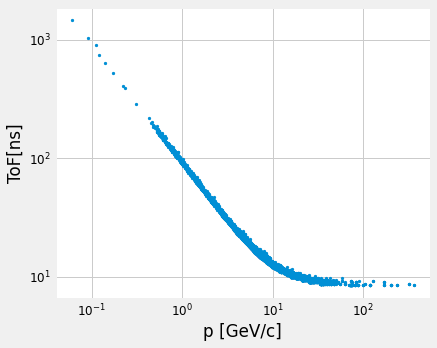

In [ ]:
#momentum vs ToF
plt.figure(figsize=(6,5))
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor'] = 'w'
plt.scatter(cargaM[:,0],cargaM[:,1]  ,lw=1,s=5, label="Histogram")
plt.ylabel("ToF[ns]");
plt.xlabel("p [GeV/c]");
plt.tick_params(axis='both',which='major',labelsize=12)
plt.xscale('log')
plt.yscale('log')

#plt.axis([0,10000,0,100])
#plt.grid()
#plt.savefig('Log.png', format='png', bbox_inches='tight', pad_inches=0.2)
plt.show()

In [ ]:
#datos crudos, se ve valores nan
ToFCa=cargaM
print('Datos crudos p[geV/c] vs ToF[ns]\n')
ToFCa, '\nDimensión', ToFCa.shape

Datos crudos p[geV/c] vs ToF[ns]



(array([[36.06,  8.74],
        [ 6.43, 16.24],
        [21.52,  9.35],
        ...,
        [  nan, -2.16],
        [  nan,  3.81],
        [21.51,  9.41]]), 'Dimensión', (10434, 2))

In [ ]:
#extraccion de datos innecesarios 
where_are_NaNs = isnan(ToFCa)
n=np.where(where_are_NaNs[:,0]==True)
ToFMom=np.delete(ToFCa, n[0], axis=0)
ToFMom, 'Dimensión',ToFMom.shape

(array([[36.06,  8.74],
        [ 6.43, 16.24],
        [21.52,  9.35],
        ...,
        [ 5.36, 19.01],
        [ 7.84, 14.08],
        [21.51,  9.41]]), 'Dimensión', (5823, 2))

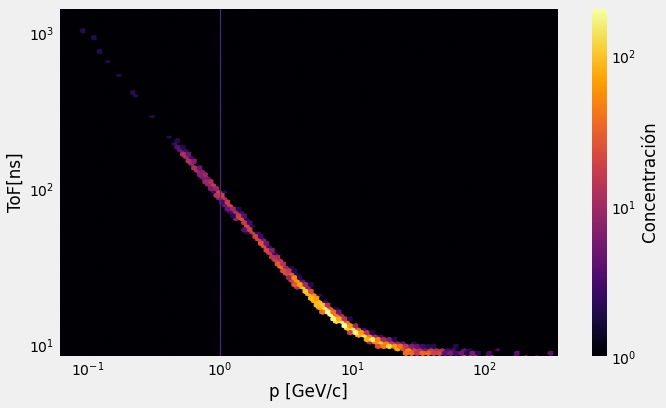

In [ ]:
#ToF vs momentum denotando la intencidad en sus areas más pobladas 
ax=plt.figure(figsize=(10,6))

plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor'] = 'w'

xmin = ToFMom[:,0].min()
xmax = ToFMom[:,0].max()
ymin = ToFMom[:,1].min()
ymax = ToFMom[:,1].max()

plt.hexbin(ToFMom[:,0],ToFMom[:,1], xscale = 'log' , yscale = 'log' , gridsize=90, bins='log', cmap='inferno')
plt.axis([xmin, xmax, ymin, ymax])
plt.axvline(1, color='#502679',ls='-', lw=1.2, label='1GeV/v')
plt.ylabel("ToF[ns]");
plt.xlabel("p [GeV/c]");

cb = plt.colorbar()
cb.set_label('Concentración')

#plt.legend()
#plt.grid(False)
plt.savefig('Cal.png', format='png', bbox_inches='tight', pad_inches=0.2)
plt.show()

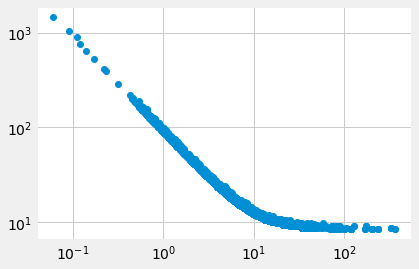

In [ ]:
gridsize=40
plt.plot(ToFMom[:,0],ToFMom[:,1],'o')
#lt.axis([0, len(ToF), ToF.min(), ToF.max()])
plt.xscale('log')
plt.yscale('log')
#cb = plt.colorbar()
#cb.set_label('mean value')
plt.show() 

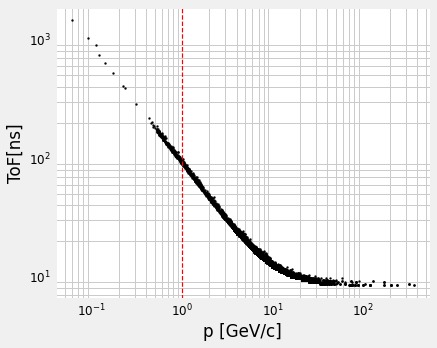

In [ ]:
#datos sin valores NaN
plt.figure(figsize=(6,5))
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor'] = 'w'
plt.scatter(ToFMom[:,0],ToFMom[:,1]  ,  lw=0.1 , s=5 , edgecolors = 'black' ,marker= 'o',color='black')
plt.axvline(1, color='r',ls='--', lw=1.2, label='1GeV/v')
#, edgecolors = 'black', marker= '8', linewidths=0.2)
plt.ylabel("ToF[ns]");
plt.xlabel("p [GeV/c]");
plt.tick_params(axis='both',which='major',labelsize=12)
plt.xscale('log')
plt.yscale('log')

#plt.axis([0,10000,0,100])
#plt.legend()
plt.grid(which='both', axis='both')
plt.savefig('GeV.png', format='png', bbox_inches='tight', pad_inches=0.2)
plt.show()

In [ ]:
#entrenando el modelo con PCA, este muestra la traspeusta pero no fue de interés en el proyecto 
pca = PCA()
S_pca_ = pca.fit_transform(ToFMom)
pca.set_params()
pca.mean_
pca.components_

array([[-0.10029845,  0.9949574 ],
       [ 0.9949574 ,  0.10029845]])

In [ ]:
S_pca_

array([[-16.91398217,  22.93491904],
       [ -6.47995858,  -5.79343023],
       [-14.84871867,   8.52942055],
       ...,
       [ -3.61660725,  -6.58020794],
       [ -8.77048738,  -4.60718496],
       [-14.78801824,   8.52548888]])

array([[-16.91398217,  22.93491904],
       [ -6.47995858,  -5.79343023],
       [-14.84871867,   8.52942055],
       ...,
       [ -3.61660725,  -6.58020794],
       [ -8.77048738,  -4.60718496],
       [-14.78801824,   8.52548888]])

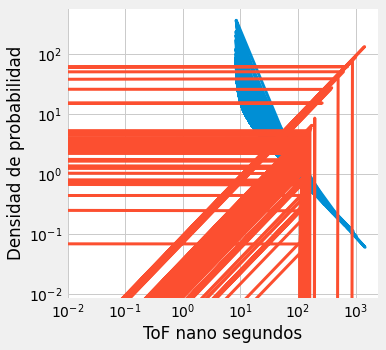

In [ ]:
plt.figure(figsize=(5,5))
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor'] = 'w'
plt.plot(ToFMom[:,1] ,ToFMom[:,0], lw=3, label="Correlacionados")
plt.plot(S_pca_[:,0] ,S_pca_[:,1], lw=3, label="Correlacionados")
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Densidad de probabilidad");
plt.xlabel("ToF nano segundos");
S_pca_

In [ ]:
ToFMom
clustering = SpectralClustering(n_clusters=4,n_init =3,
            assign_labels="kmeans",
             random_state=0)
#clustering. fit(ToFMom.reshape(-1,1))

In [ ]:
cls= np.array([[1,2,3],[1,3,2],[3,2,1]], dtype=int)
cls[1]#[:]
len(ToFMom)

5823

In [ ]:
#netrenando el modelo con 2, 3 y 4 clusters, se imprime cada grupo distribuido 
cls= np.array([2,3,4], dtype=int)
eti= np.zeros((3, len(ToFMom)), dtype=int)
c=0
for i in cls:
  clustering = AgglomerativeClustering(n_clusters=i).fit(ToFMom)
  clustering.n_clusters_
  #se extraen las etiquetas y separamos para ver cuantas y de qué tipo son
  eti[c]=clustering.labels_
  print(f'Numero de elemento por etiqueta {i} cluster, tamaño {len(eti[c])}')
  print(np.unique(eti[c], return_counts=True))
  c+=1

col= np.zeros((3, len(ToFMom)), dtype=object)
for i in range(len(cls)):
  colores=['red','green','blue','black','pink']#
  t=0
  for row in eti[i]:
    col[i][t] = colores[row]
    t+=1

Numero de elemento por etiqueta 2 cluster, tamaño 5823
(array([0, 1]), array([5815,    8]))
Numero de elemento por etiqueta 3 cluster, tamaño 5823
(array([0, 1, 2]), array([5511,    8,  304]))
Numero de elemento por etiqueta 4 cluster, tamaño 5823
(array([0, 1, 2, 3]), array([   8, 5422,  304,   89]))


In [ ]:
eti.shape

(3, 5823)

In [ ]:
copya =  pd.DataFrame()
copya['"p[GeV/c]']=ToFMom[:,0]
copya['ToF']=ToFMom[:,1]
copya['label'] = eti[2];

cantidadGrupoa =  pd.DataFrame()
cantidadGrupoa['color']=colores
cantidadGrupoa['cantidad']=copya.groupby('label').size()
cantidadGrupoa

,color,cantidad
0,red,8.0
1,green,5422.0
2,blue,304.0
3,black,89.0
4,pink,NaN


In [ ]:
#netrenando el modelo con 2, 3 y 4 clusters, se imprime cada grupo distribuido 
clsk= np.array([2,3,4], dtype=int)
labels= np.zeros((3, len(ToFMom)), dtype=int)
c=0
for i in clsk:
  kmeans = KMeans(n_clusters=i).fit(ToFMom)
  # Predicting the clusters
  labels[c]=kmeans.predict(ToFMom)
  print(f'Numero de elemento por etiqueta {i} cluster, tamaño {len(labels[c])}')
  print(np.unique(labels[c], return_counts=True))
  c+=1


asignar= np.zeros((3, len(ToFMom)), dtype=object)
for i in range(len(clsk)):
  colores=['red','green','blue','black','pink']#
  t=0
  for row in labels[i]:
     asignar[i][t] = colores[row]
     t+=1

Numero de elemento por etiqueta 2 cluster, tamaño 5823
(array([0, 1]), array([5817,    6]))
Numero de elemento por etiqueta 3 cluster, tamaño 5823
(array([0, 1, 2]), array([5441,    6,  376]))
Numero de elemento por etiqueta 4 cluster, tamaño 5823
(array([0, 1, 2, 3]), array([  95, 5347,  375,    6]))


In [ ]:
np.unique(labels[0], return_counts=True)

(array([0, 1]), array([5817,    6]))

In [ ]:
centroids = kmeans.cluster_centers_

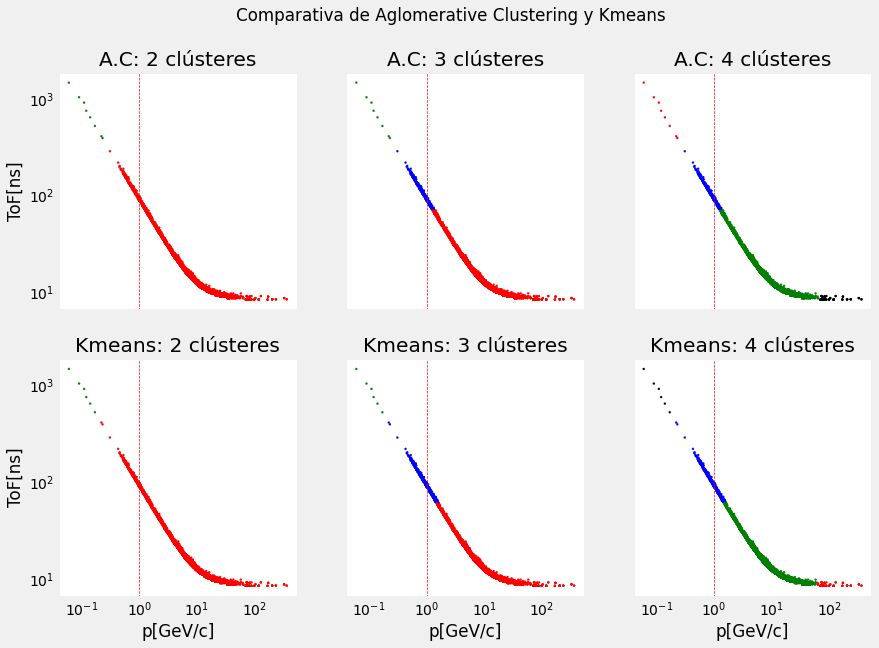

In [ ]:
fig, axs = plt.subplots(2,3,figsize=(13,9))
fig.suptitle('Comparativa de Aglomerative Clustering y Kmeans')
axs[0, 0].scatter(ToFMom[:, 0], ToFMom[:, 1], c=col[0],s=5,  marker= '8', linewidths=0.2, label='h')
axs[0, 0].axvline(1, color='r',ls='--', lw=0.7)
axs[0, 0].set_title('A.C: 2 clústeres')
axs[0, 0].set_xscale("log")
axs[0, 0].set_yscale("log")
axs[0, 0].grid(False)
#axs[0, 0].legend()

axs[0, 1].scatter(ToFMom[:, 0], ToFMom[:, 1], c=col[1],s=5,  marker= '8', linewidths=0.2)
axs[0, 1].set_title('A.C: 3 clústeres')
axs[0, 1].set_xscale("log")
axs[0, 1].set_yscale("log")
axs[0, 1].axvline(1, color='r',ls='--', lw=0.7)
axs[0, 1].grid(False)
#axs[0, 1].legend()


axs[0, 2].scatter(ToFMom[:, 0], ToFMom[:, 1], c=col[2],s=5,  marker= '8', linewidths=0.2)
axs[0, 2].axvline(1, color='r',ls='--', lw=0.7)
axs[0, 2].set_title('A.C: 4 clústeres')
axs[0, 2].set_xscale("log")
axs[0, 2].set_yscale("log")
axs[0, 2].grid(False)
#axs[0, 2].legend()

axs[1, 0].scatter(ToFMom[:, 0], ToFMom[:, 1], c=asignar[0],s=5,  marker= '8', linewidths=0.2)
axs[1, 0].axvline(1, color='r',ls='--', lw=0.7)
axs[1, 0].set_title('Kmeans: 2 clústeres')
axs[1, 0].set_xscale("log")
axs[1, 0].set_yscale("log")
axs[1, 0].grid(False)
#axs[1, 0].legend()

axs[1, 1].scatter(ToFMom[:, 0], ToFMom[:, 1], c=asignar[1],s=5, marker= '8', linewidths=0.2)
axs[1, 1].axvline(1, color='r',ls='--', lw=0.7)
axs[1, 1].set_title('Kmeans: 3 clústeres')
axs[1, 1].set_xscale("log")
axs[1, 1].set_yscale("log")
axs[1, 1].grid(False)
#axs[1, 1].legend()

axs[1, 2].scatter(ToFMom[:, 0], ToFMom[:, 1], c=asignar[2],s=5, marker= '8', linewidths=0.2)
axs[1, 2].axvline(1, color='r',ls='--', lw=0.7)
axs[1, 2].set_title('Kmeans: 4 clústeres')
axs[1, 2].set_xscale("log")
axs[1, 2].set_yscale("log")
axs[1, 2].grid(False)
#axs[1, 2].legend()

for ax in axs.flat:
    ax.set(xlabel='p[GeV/c]', ylabel='ToF[ns]')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.savefig('Ak.png', format='png', bbox_inches='tight', pad_inches=0.3)
plt.show()

In [ ]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, ToFMom)
closest

array([ 889, 2706, 1299, 4241])

In [ ]:
l=2
#aglomerative
copya =  pd.DataFrame()
copya['"p[GeV/c]']=ToFMom[:,0]
copya['ToF']=ToFMom[:,1]
copya['label'] = eti[l];

cantidadGrupoa =  pd.DataFrame()
cantidadGrupoa['color']=colores
cantidadGrupoa['cantidad']=copya.groupby('label').size()
print('aglomerative\n')
cantidadGrupoa

aglomerative



,color,cantidad
0,red,8.0
1,green,5422.0
2,blue,304.0
3,black,89.0
4,pink,NaN


In [ ]:
#kmeans
copy =  pd.DataFrame()
copy['"p[GeV/c]']=ToFMom[:,0]
copy['ToF']=ToFMom[:,1]
copy['label'] = labels[l];

cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
print('kmeans\n')
cantidadGrupo

kmeans



,color,cantidad
0,red,95.0
1,green,5347.0
2,blue,375.0
3,black,6.0
4,pink,NaN


In [ ]:
kmt=np.unique(labels[0], return_counts=True)
agt=np.unique(eti[0], return_counts=True)
kmf=np.unique(labels[1], return_counts=True)
agf=np.unique(eti[1], return_counts=True)
agc=np.unique(eti[2], return_counts=True)
kmc=np.unique(labels[2], return_counts=True)

k2=[str(round((100*kmt[1][0]/sum(kmt[1])),2))+' %',str(round(100*kmt[1][1]/sum(kmt[1]),2))+' %']
a2=[str(round((100*agt[1][0]/sum(agt[1])),2))+' %',str(round(100*agt[1][1]/sum(agt[1]),2))+' %']
k3=[str(round((100*kmf[1][0]/sum(kmf[1])),1))+' %',str(round(100*kmf[1][1]/sum(kmf[1]),1))+' %', str(round(100*kmf[1][2]/sum(kmf[1]),1))+' %']
a3=[str(round((100*agf[1][0]/sum(agf[1])),1))+' %',str(round(100*agf[1][1]/sum(agf[1]),1))+' %', str(round(100*agf[1][2]/sum(agf[1]),1))+' %']
k4=[str(round((100*kmc[1][0]/sum(kmc[1])),1))+' %',str(round(100*kmc[1][1]/sum(kmc[1]),1))+' %',str(round(100*kmc[1][2]/sum(kmc[1]),1))+' %',str(round(100*kmc[1][3]/sum(kmc[1]),1))+' %']
a4=[str(round((100*agc[1][0]/sum(agc[1])),1))+' %',str(round(100*agc[1][1]/sum(agc[1]),1))+' %',str(round(100*agc[1][2]/sum(agc[1]),1))+' %',str(round(100*agc[1][3]/sum(agc[1]),1))+' %']

In [ ]:
sum(agt[1]),sum(kmt[1]),sum(kmc[1]),sum(agf[1]),sum(kmf[1]),sum(kmc[1])

(5823, 5823, 5823, 5823, 5823, 5823)

In [ ]:
x=0
y=1
# Mostrar las tres indendientemente
colores=['red','green','blue','black']#,'pink'
mapeado = range(len(colores))

plt.figure(figsize=(8,6))
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor'] = 'white'
plt.plot(kmt[x],kmt[y],'-.',c='#0819EC',markeredgecolor="#0819EC", lw=1.8, label=f"2 cluster kmeans\n{kmt[y]}");
plt.plot(agt[x],agt[y],'-.',c='#05EA13',markeredgecolor="#05EA13", lw=1.8, label=f"2 clusters Aglomerative\n{agt[1]}");
plt.plot(kmf[x],kmf[y],'.-',c='#F4FA1C',markeredgecolor="#F4FA1C", lw=1.8, label=f"3 cluster kmeans\n{kmf[y]}");
plt.plot(agf[x],agf[y],'.-',c='#B2B920',markeredgecolor="#FA1CBD", lw=1.8, label=f"3 clusters Aglomerative\n{agf[y]}");
plt.plot(agc[x],agc[y],'.-',c='#FA1C1C',markeredgecolor="#FA1C1C", lw=1.8, label=f"4 clusters Aglomerative\n{agc[y]}");
plt.plot(kmc[x],kmc[y],'.-',c='#1CFAE2',markeredgecolor="#1CFAE2", lw=1.8, label=f"4 cluster kmeans\n{kmc[y]}");
#plt.plot(gmm_x, np.squeeze(Muons_distribucion),'-',c='#05EA13',markeredgecolor="#0819EC", lw=1.8, label="Muons");
#plt.plot(gmm_x, np.squeeze(Mult_distribucion),'-',c='#F80A0A',markeredgecolor="#0819EC", lw=1.8, label="Multi-particula");
plt.xticks(mapeado, colores)
#plt.axvline(punm[0], color='k',ls='--', lw=0.7)
#plt.axvline(punm[1], color='k',ls='--', lw=0.7)
plt.ylabel("Cantidad de datos");
plt.xlabel("Cluster");

#plt.box()
plt.grid(False)
plt.legend()
plt.savefig('coin.png', format='png', bbox_inches='tight', pad_inches=0.3)
plt.show()

NameError: ignored

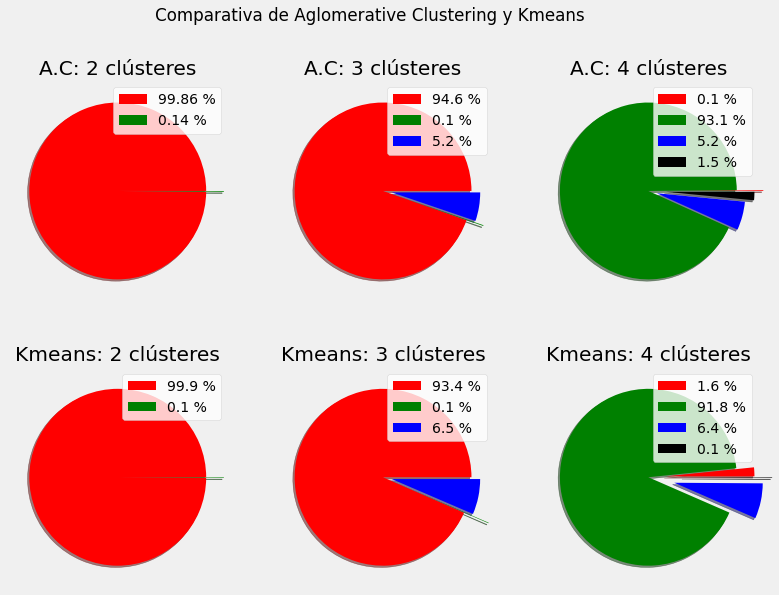

In [ ]:
colores=['red','green']#,'blue','black','pink']#
colores1=['red','green','blue']#,'black']#,'pink']#
colores2=['red','green','blue','black']#,'pink']#


fig, axs = plt.subplots(2,3,figsize=(12,9))
fig.suptitle('Comparativa de Aglomerative Clustering y Kmeans')

patches, texts  =axs[0, 0].pie(agt[1],shadow=True,colors=colores ,radius=1,explode=(0, 0.2))
axs[0, 0].set_title('A.C: 2 clústeres')
axs[0, 0].grid(False)
axs[0, 0].legend(a2)#wedges, s,loc='upper center',bbox_to_anchor=(1, 0, 0.5, 1))
#plt.setp(autotexts, size=11, weight="bold")


patches, texts  =axs[0, 1].pie(agf[1], shadow=True , colors=colores1 , radius=1 ,  explode=(0, 0.2, 0.1))
axs[0, 1].set_title('A.C: 3 clústeres')
axs[0, 1].grid(False)
autotexts[2].set_color('white')
autotexts[0].set_color('black')
axs[0, 1].legend(a3)



wedges, texts =axs[0, 2].pie(agc[1], shadow=True,colors=colores2 ,radius=1,explode=(0.3, 0, 0.1,0.2))
axs[0, 2].set_title('A.C: 4 clústeres')
axs[0, 2].grid(False)
axs[0, 2].legend(a4)#wedges, colores2,loc='upper center',bbox_to_anchor=(1, 0, 0.5, 1))

axs[1, 0].pie(kmt[1], shadow=True,colors=colores ,radius=1,explode=(0, 0.2))
axs[1, 0].set_title('Kmeans: 2 clústeres')
axs[1, 0].grid(False)
axs[1, 0].legend(k2)

patches, texts  =axs[1, 1].pie(kmf[1], shadow=True,colors=colores1 ,radius=1,explode=(0, 0.3, 0.1))
axs[1, 1].set_title('Kmeans: 3 clústeres')
axs[1, 1].grid(False)
autotexts[2].set_color('white')
axs[1, 1].legend(k3)

wedges, texts =axs[1, 2].pie(kmc[1], shadow=True,colors=colores2 ,radius=1,explode=(0.2, 0, 0.3,0.4))
axs[1, 2].set_title('Kmeans: 4 clústeres')
axs[1, 2].grid(False)
autotexts[3].set_color('white')
autotexts[2].set_color('white')
axs[1, 2].legend(k4)#wedges, colores2,loc="upper left",bbox_to_anchor=(1, 0, 0.5, 1))


plt.savefig('tor.png', format='png', bbox_inches='tight', pad_inches=0.3)
plt.show()

In [ ]:
um(agt[1]),sum(kmt[1]),sum(kmc[1]),sum(agf[1]),sum(kmf[1]),sum(kmc[1])

(5823, 5823, 5823, 5823, 5823, 5823)